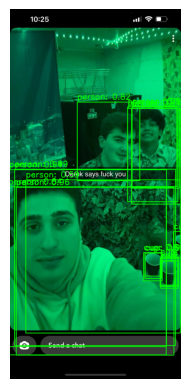

Detected objects:
person: 0.82
person: 0.72
person: 0.64
person: 0.81
person: 0.78
person: 0.94
person: 0.99
person: 0.59
person: 0.84
person: 0.96
cup: 0.81
cup: 0.79
cup: 0.64
cup: 0.90
cup: 0.95
cup: 0.66
cup: 0.51
cup: 0.94


In [4]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load YOLO pre-trained model and classes
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread("IMG_1460.JPEG")

# Get image dimensions
height, width, _ = image.shape

# Prepare image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Perform forward pass
outs = net.forward(net.getUnconnectedOutLayersNames())

# Process detection results
detected_objects = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            label = f"{classes[class_id]}: {confidence:.2f}"
            detected_objects.append(label)

            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print detected objects
print("Detected objects:")
for obj in detected_objects:
    print(obj)
